https://towardsdatascience.com/naive-bayes-document-classification-in-python-e33ff50f937e

In [15]:
import pathlib
import sklearn
import numpy
import nltk
import spacy
import pandas as pd
import numpy as np
import itertools
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('train-balanced-sarcasm.csv')

In [6]:
#cleaning out empty comments:
empty_comments = data["comment"].isna()
# empty_comments = test_data["comment"].isna()
empty_comments = data[empty_comments].index
# empty_comments = test_data[empty_comments].index
data.drop(empty_comments, axis=0, inplace=True)
# test_data.drop(empty_comments, axis=0, inplace=True)

In [7]:
#split data:
X_train, X_test, y_train, y_test = train_test_split(data["comment"], data["label"],test_size =0.3, random_state=50)

## **Bag of Words**
#### CountVectorizer:

In [8]:
vectorizer = CountVectorizer(min_df=1, # in how many documents the term minimally occurs
                             tokenizer=nltk.word_tokenize) # we use the nltk tokenizer to split the text into tokens

In [9]:
X_train_cv = vectorizer.fit_transform(X_train)

In [10]:
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train_cv, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [11]:
# naive_bayes = MultinomialNB()
X_test_cv = vectorizer.transform(X_test)
predictions = naive_bayes.predict(X_test_cv)

In [13]:
report = classification_report(y_test, predictions, digits = 3)
print(report)

              precision    recall  f1-score   support

           0      0.692     0.677     0.685    151624
           1      0.684     0.699     0.691    151608

    accuracy                          0.688    303232
   macro avg      0.688     0.688     0.688    303232
weighted avg      0.688     0.688     0.688    303232



###### The accuracy score tells us: out of all of the identifications we made, how many were correct? true positives + true negatives / total observations

###### The precision score tells us: out of all of the ethics identifications we made, how many were correct? true positives / (true positives + false positives)

######  The recall score tells us: out of all of the true cases of ethics, how many did we identify correctly? true positives / (true positives + false negatives)

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

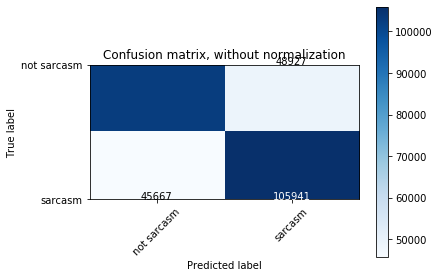

[[102697  48927]
 [ 45667 105941]]


In [18]:
CATEGORIES = ["not sarcasm","sarcasm"]
cm = confusion_matrix(y_test, predictions)
# sns.heatmap(cm, square=False, annot=True, cmap='RdBu', cbar=False, xticklabels=['not sarcasm', 'sarcasm'], yticklabels=['not sarcasm', 'sarcasm'])
# plt.xlabel('true label')
# plt.ylabel('predicted label')
plt.figure()
plot_confusion_matrix(cm, classes=CATEGORIES, title='Confusion matrix, without normalization')

#Als je hem wel genormaliseerd wil:
# plt.figure()
# plot_confusion_matrix(b_cm, classes=CATEGORIES, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()
print(cm)


#### TF-IFD

In [19]:
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(X_train_cv)

In [21]:
naive_bayes2 = BernoulliNB()
naive_bayes2.fit(train_tfidf, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [24]:
test_data_vec = tfidf_transformer.transform(X_test_cv) #wel nodig??

In [25]:
predicted2 = naive_bayes2.predict(test_data_vec)

In [26]:
report2 = classification_report(y_test, predicted2, digits = 3)
print(report2)

              precision    recall  f1-score   support

           0      0.692     0.677     0.685    151624
           1      0.684     0.699     0.691    151608

    accuracy                          0.688    303232
   macro avg      0.688     0.688     0.688    303232
weighted avg      0.688     0.688     0.688    303232



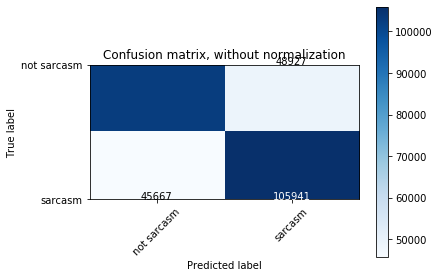

[[102697  48927]
 [ 45667 105941]]


In [28]:
CATEGORIES = ["not sarcasm","sarcasm"]
cm2 = confusion_matrix(y_test, predicted2)
# sns.heatmap(cm, square=False, annot=True, cmap='RdBu', cbar=False, xticklabels=['not sarcasm', 'sarcasm'], yticklabels=['not sarcasm', 'sarcasm'])
# plt.xlabel('true label')
# plt.ylabel('predicted label')
plt.figure()
plot_confusion_matrix(cm2, classes=CATEGORIES, title='Confusion matrix, without normalization')

#Als je hem wel genormaliseerd wil:
# plt.figure()
# plot_confusion_matrix(b_cm, classes=CATEGORIES, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()
print(cm2)
